## KNN Classifier - Zoo Dataset

In [2]:
#Importing Required libraries for KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# load the dataset as a dataframe using pd
data = pd.read_csv('C:/Users/Anusha/Desktop/ExcelRProjects/dataset/Zoo.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
data.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

###### This dataset consists of 101 animals from a zoo. There are 17 variables with various traits to describe the animals. The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

##### From the above given dataset we have to predict the classification of the animals, based upon the above Input variables

In [5]:
data.head(5)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Perform Initial EDA

In [6]:
data.describe()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
data[data.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [8]:
## Droping the animal name variable as it dont help in predicting the Type of animal
data.drop("animal name",axis=1,inplace=True)

In [9]:
data.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


#### No duplicate values are existing

In [10]:
## Checking For Outliers in the dataset
from sklearn.ensemble import IsolationForest

In [11]:
# Training the model
# clf is classifier, random_state is subset of the data contamination can be .01 %
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data)

IsolationForest(contamination=0.01, random_state=10)

In [12]:
# Predictions
y_pred_outliers = clf.predict(data)

In [13]:
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [14]:
data.shape

(101, 17)

In [15]:
data['scores']=clf.decision_function(data)

In [16]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,scores
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0.169721
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,0.252648
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,0.193616
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0.169721
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,0.272070


In [17]:
data['anomaly']=clf.predict(data.iloc[:,0:17])

In [18]:
#Print the outlier data points
data[data['anomaly']==-1]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,scores,anomaly
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7,-0.010896,-1


In [19]:
data.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [20]:
data[data['type']==7]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,scores,anomaly
13,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7,0.072532,1
14,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7,0.134817,1
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7,0.149225,1
46,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7,0.149225,1
53,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7,0.023518,1
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7,-0.010896,-1
77,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,7,0.042841,1
81,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,0.117325,1
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7,0.146742,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,0.117325,1


###### AS there can be a posibility animal with the above features of record 72 exists,so we need not eliminate the record

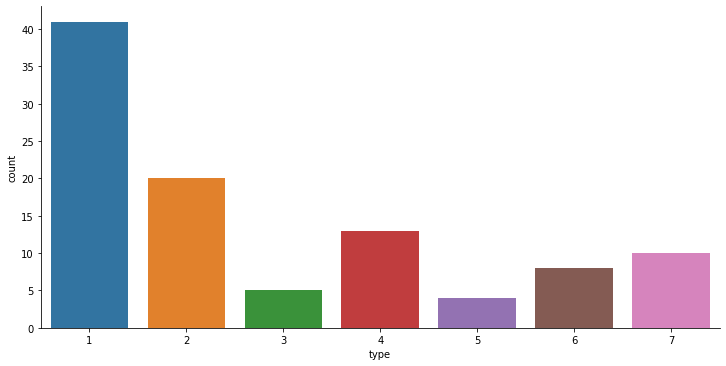

In [30]:
#use seaborn to plot the count of each 7 class_type
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
sns.factorplot('type', data=data, kind="count",size = 5,aspect = 2)

In [31]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in data.hair]
unique_color = list(set(color_list))
unique_color

['blue', 'red']

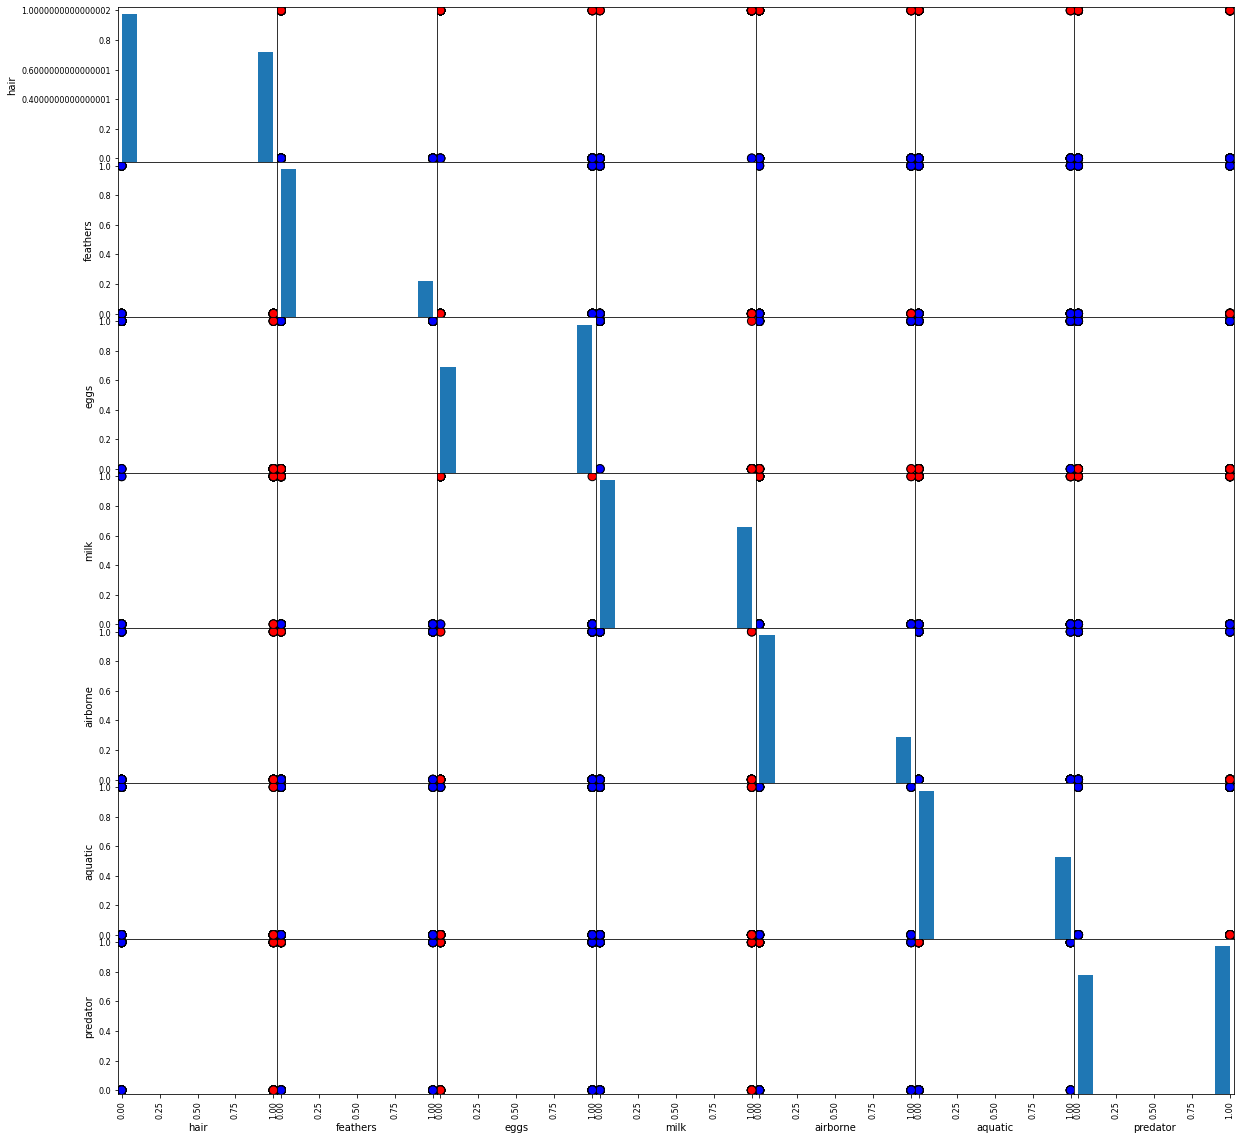

In [32]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(data.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',

                                       edgecolor= "black")
plt.show()

In [33]:
data=data.iloc[:,0:17]

In [34]:
array = data.values
X = array[:, 0:16]
Y = array[:,16]

In [35]:
num_folds = 10
kfold = KFold(n_splits=10)

In [36]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=kfold)

In [37]:
print(results.mean())

0.76


### Finding the best no. of nearestneighbour parameter using gridsearchcv

In [38]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [40]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [41]:
print(grid.best_score_)

0.96


In [42]:
print(grid.best_params_)

{'n_neighbors': 1}


### Visualizing the CV results

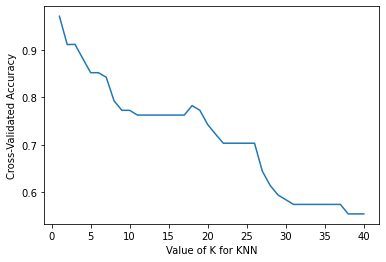

In [43]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [44]:
## building the model with best no. of neighbours
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, X, Y, cv=kfold)

In [45]:
print(results.mean())

0.9700000000000001


###### The model is giving an accuracy of 97% by which we can consider it as a best model for predicting type values of different animals using the given Inputs